In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
print(df.dtypes) #Lists all the Attribute Types
print('--------------------------------')
print(df.shape) # Gives the shape of the dataframe (# of rows, # of columns)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object
--------------------------------
(1599, 12)


# Data Exploration using Statistical Descriptions

### Central Tendency Measures
###### Finding the mean, median, mode and midrange. We also would like to have an idea of the dispersion of the data, how the data is spread, by finding the range, quartiles and IQR.

In [15]:
def describe_new(df): #function that adds range, midrange, and IQR to the .describe() table
    df1 = df.describe() #stores  the original .describe() into df1
    df1.loc["range"] = df1.loc['max'] - df1.loc['min'] #creates another row for the ranges
    df1.loc["Midrange"] = (df1.loc['max'] - df1.loc['min']) / 2 #Creates another row for the midrange
    df1.loc["IQR"] = df1.loc['75%'] - df1.loc['25%'] #Creates another row for Interquantile Range
    return df1

describe_new(df)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000
range,11.300000,1.460000,1.000000,14.600000,0.599000,71.000000,283.000000,0.013620,1.270000,1.670000,6.500000,5.000000
Midrange,5.650000,0.730000,0.500000,7.300000,0.299500,35.500000,141.500000,0.006810,0.635000,0.835000,3.250000,2.500000


In [6]:
df.mode()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.2,0.6,0.0,2.0,0.08,6.0,28.0,0.9972,3.3,0.6,9.5,5


### Skewness
###### Measures the deviation of the given distribution of a random variable from a symmetric distribution. 

In [7]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

### Class Imbalance
###### How balanced the class values are. So when we have a class imbalance, the machine learning classifier tends to be more biased towards the majority class, causing bad classification of the minority class.

In [8]:
class_count = df.groupby('quality').size()
class_count

quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64

In [9]:
print('3: ', class_count[3]/df['quality'].size)
print('4: ', class_count[4]/df['quality'].size)
print('5: ', class_count[5]/df['quality'].size)
print('6: ', class_count[6]/df['quality'].size)
print('7: ', class_count[7]/df['quality'].size)
print('8: ', class_count[8]/df['quality'].size)

3:  0.006253908692933083
4:  0.03314571607254534
5:  0.425891181988743
6:  0.3989993746091307
7:  0.12445278298936835
8:  0.01125703564727955


### Correlation
###### How one or more attributes are related to each other.

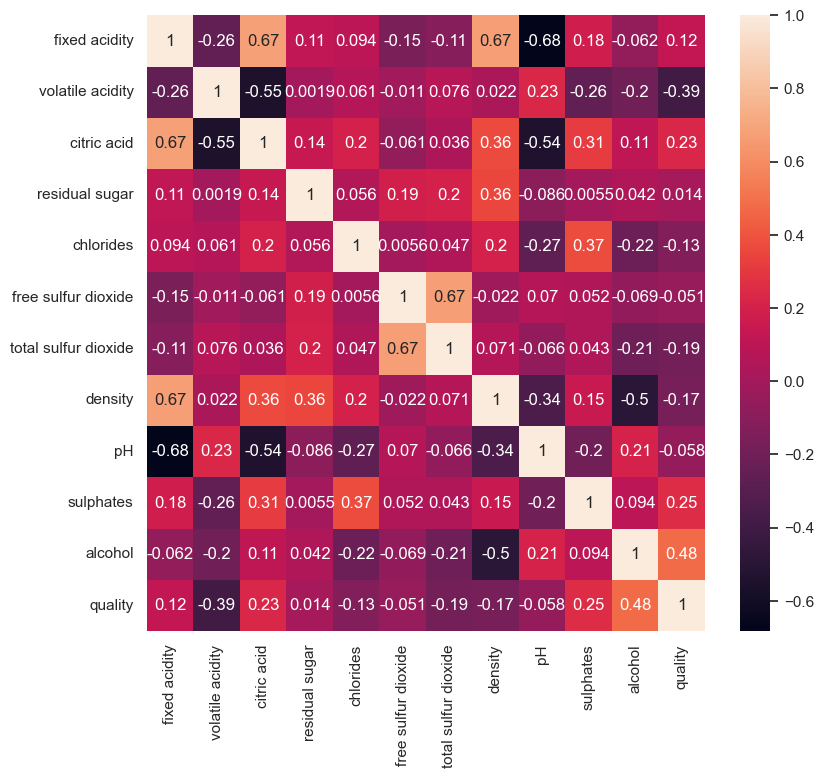

In [9]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
sns.set(rc = {'figure.figsize':(10, 10)})

# Data Visualization

<Axes: xlabel='fixed acidity', ylabel='pH'>

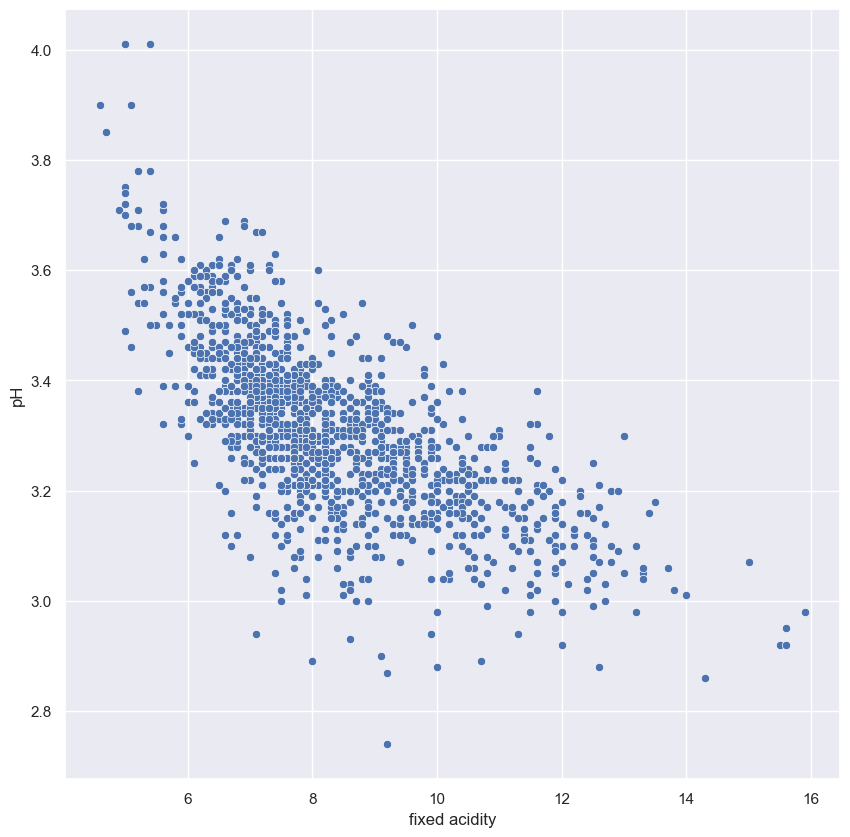

In [29]:
sns.scatterplot(data = df, x = "fixed acidity", y = 'pH')